# Implementación del descenso del gradiente simple

In [3]:
import numpy as np
from sympy import diff, symbols
import matplotlib.pyplot as plt

## enfoque analítico

In [4]:
# Esta funcion calcula el gradiente para cualquier funcion, dada una funcion lambda y la lista de sus correspondientes variables
def gradiente(funcion_lambda, lista_variables:list):

    import numpy as np
    from sympy import diff, symbols, lambdify 

    gradiente = {}                                                      # el gradiente será un diccionario donde las claves seran la funcion escrita y los valores, la funcion gradiente de cada componente
    simb_var = symbols(lista_variables)                                 # guardo los simbolos de las variables que utilizaré después

    for variable in lista_variables:                                    # para cada variable en mi lista de variables vamos a calcular su derivada parcial

        derivada_parcial = diff(funcion_lambda(*simb_var), variable)    # se crea la funcion gradiente 'escrita', es necesario desempaquetar todas las variables para darselas a la funcion lambda
        f_dev_parcial = lambdify(simb_var, derivada_parcial)            # comvierto la funcion 'escrita' en otra funcion lambda, que es la derivada parcial de la variable correspondiente
        gradiente[derivada_parcial] = f_dev_parcial                     # añado a mi diccionario tanto la derivada 'escrita' (llave), como la derivada en formato lambda (valor)

    return gradiente                                                    # devuelvo el diccionario de mis derivadas parciales, que juntas, conforman el vector gradiente



# esta funcion calcula el descenso por gradiente dandole una funcion lambda su lista de variables, el punto inicial, el learning rate, la precision, y un maximo de iteraciones
def gradient_descent(funcion_lambda, lista_variables:list, punto_inicial:list, rate:float, precision:float, maxit:int):

    x = np.array(punto_inicial).astype(float)                           # comvierto el punto en un array y lo paso a float para que no me de problemas
    grad_f = gradiente(funcion_lambda, lista_variables)                 # calculo mi gradiente que tiene los componenetes 

    if len(grad_f) == 1:                                                # si mi vector gradiente es UNIVARIALBLE (solo x) ejecuta el siguiente código

        for epoca in range(maxit):                                      # para cada epoca 

            for componente in grad_f.values():                          # este mini bucle me permite asignarle un punto a mi gradiente univariable, es para acceder al valor del diccionario
                grad = np.array(componente(x))

            norm_grad = np.linalg.norm(grad)                            # calculo la norma de mi vector de un solo componente

            if norm_grad < precision:                                   # si el valor obtenido esta por debajo de la precision requerida ROMPE el bucle
                break

            x -= rate*grad                                              # se actualiza el valor del nuestro punto

    else:                                                               # si vector gradiente es MULTIVARIABLE (x,y,z, etc.) ejecuta el siguiente código
        
        for epoca in range(maxit):                                      # para cada época 
        
            grad = np.array([componente(*x) for componente in grad_f.values()])     # le asigno el punto de análisis a mi vector gradiente y me devuelve el punto objetivo en forma de array
            norm_grad = np.linalg.norm(grad)                                        # calculo la norma de mi vector gradiente multivariable

            if norm_grad < precision:                                   # si la norma esta por debajo de mi umbral ROMPE el bucle
                break

            x -= rate*grad                                              # se actualiza el punto de análisis

    return x                                                            # se devuleve el último punto de analisis



## Enfoque de datos

In [5]:
f = lambda w, b, x, y: (np.sum(np.array(y) - w*np.array(x) + b))**2
grad_f= gradiente(f, ['w','b', 'x', 'y'])

lista_de_grad = list(grad_f.keys())

cost_grad_f = np.array([grad_f[lista_de_grad[0]], grad_f[lista_de_grad[1]]])

print(lista_de_grad[0])
print(lista_de_grad[1])
print(cost_grad_f)

-2*x*(b - w*x + y)
2*b - 2*w*x + 2*y
[<function _lambdifygenerated at 0x000001FB55026320>
 <function _lambdifygenerated at 0x000001FB5506D870>]


### BATCH GRADIENT DESCENT

In [19]:
def generar_datos(f= lambda x: 0.5*x +10):
    import numpy as np

    x = np.linspace(0,5)
    ruido_varianza= 0.05
    y = f(x) + np.random.randint(low = -10, high= 10, size = x.shape[0])*ruido_varianza

    return np.array([x,y])

def batch_gradient_descent(cost_func, variables_lst, learning_rate, max_iter, precision):
    import random

    w = random.random()
    b = random.random()

    cost_grad = gradiente(cost_func, variables_lst)         # calculo el gradiente
    lista_de_grad = list(cost_grad.keys())
    cost_grad_f = [cost_grad[lista_de_grad[0]], cost_grad[lista_de_grad[1]]]               # el primer valor del diccionario de gradientes es mi derivada respecto a w

    print('Los componentes del gradiente de la función de coste: \n')
    print(f'derivada parcial de w: {lista_de_grad[0]}')
    print(f'derivada parcial de b: {lista_de_grad[1]}\n')

    w_ = 10_000
    b_ = 500 

    print('Se debe converger hacia los siguientes coeficientes: \n')
    print(f'El peso w: {w_}')
    print(f'El sesgo b: {b_}')

    data = generar_datos(f= lambda x: x*w_ + b_)                 # datos a partir de una funcion con ruido añadido; W y b COMVERGERÁN AL MULTIPLO DE X EN ESTE CASO 10
    x = data[0]
    y = data[1]

    for epoch in range(max_iter):

        error = np.sum(cost_func(w, b, x, y))

        w -= learning_rate*(np.sum(cost_grad_f[0](w, b, x, y)))
        b -= learning_rate*(np.sum(cost_grad_f[1](w, b, x, y)))

        new_error = np.sum(cost_func(w, b, x, y))

        if abs(error - new_error) < precision:
            print(f'\nSe ha logrado la convergencia en la época número {epoch}')
            break

    p = np.array([w, b])
    return p


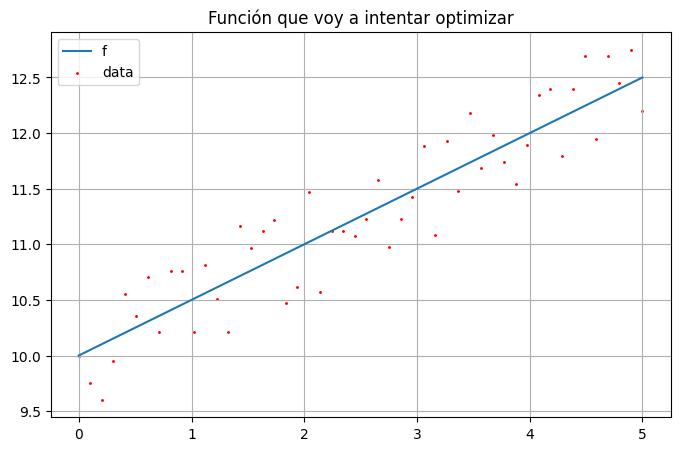

In [20]:
data = generar_datos()

x = data[0]
y = data[1]

fig = plt.figure(figsize = (8, 5))

plt.plot(x,
         0.5*x +10,
        label = 'f')

plt.scatter(x,y, c = 'red', s = 1.1, label = 'data')
plt.grid()
plt.legend()
plt.title('Función que voy a intentar optimizar')

plt.show()

In [21]:
batch_gradient_descent(lambda w, b, x, y: (np.sum(np.array(y) - (w*np.array(x) + b)))**2, ['w', 'b','x', 'y'], 0.0001, 10000, 0.000001)

Los componentes del gradiente de la función de coste: 

derivada parcial de w: -2*x*(-b - w*x + y)
derivada parcial de b: 2*b + 2*w*x - 2*y

Se debe converger hacia los siguientes coeficientes: 

El peso w: 10000
El sesgo b: 500

Se ha logrado la convergencia en la época número 6032


array([9999.98717893,  500.0153415 ])

In [132]:
data = generar_datos()
x = data[0]
y = data[1]
# data = np.array(list(zip(x, y)))
# print(data[:10])

# index = [i for i,_ in enumerate(data)]
# print(index)

# np.random.shuffle(data)

# print(data[:,0])

for iteration in range(len(data[0])):
    x_ex = data[0][iteration]
    y_ex = data[1][iteration]

    print(x_ex, y_ex)

0.0 10.35
0.10204081632653061 10.251020408163265
0.20408163265306123 10.10204081632653
0.30612244897959184 10.153061224489797
0.40816326530612246 10.55408163265306
0.5102040816326531 10.355102040816327
0.6122448979591837 10.656122448979591
0.7142857142857143 9.857142857142858
0.8163265306122449 10.008163265306122
0.9183673469387755 10.659183673469387
1.0204081632653061 10.610204081632652
1.1224489795918369 10.86122448979592
1.2244897959183674 10.212244897959183
1.3265306122448979 10.91326530612245
1.4285714285714286 10.814285714285713
1.5306122448979593 10.965306122448979
1.6326530612244898 10.516326530612243
1.7346938775510203 10.76734693877551
1.836734693877551 10.418367346938776
1.9387755102040818 11.41938775510204
2.0408163265306123 10.720408163265306
2.142857142857143 11.52142857142857
2.2448979591836737 11.172448979591838
2.3469387755102042 11.373469387755101
2.4489795918367347 11.174489795918367
2.5510204081632653 11.625510204081632
2.6530612244897958 11.226530612244899
2.755102

In [17]:
epochs = 50 
t0 = epochs/10
t1 = epochs

def learning_shedule(t):
    return t0/(t + t1)


def stocastick_gradient_descent(cost_func, variables_lst, learning_rate, epochs, precision):
    import random

    w = random.random()                                     # mi punto inicial
    cost_grad = gradiente(cost_func, variables_lst)         # calculo el gradiente
    lista_de_grad = list(cost_grad.keys())
    cost_grad_f = cost_grad[lista_de_grad[0]]               # el primer valor del diccionario de gradientes es mi derivada respecto a w

    data = generar_datos(f= lambda x: x*100)                 # datos a partir de una funcion con ruido añadido
    x = data[0]
    y = data[1]
    m = len(x)


    for epoch in range(epochs):

        np.random.shuffle(data)
        error = np.sum(cost_func(w, x, y))                  # con w viejo

        for iteration in range(m):

            x_examle = data[0][iteration]
            y_example = data[1][iteration]
            cost_grad_i = cost_grad_f(w, x_examle, y_example)
            w -= learning_rate*cost_grad_i
            new_error = (cost_func(w, x_examle, y_example))              # con w nuevo

        if abs(error- new_error) < precision:
            print(epoch)
            break


    return w

In [18]:
stocastick_gradient_descent(lambda w, x, y: (np.sum(np.array(y) - w*np.array(x)))**2, ['w', 'x', 'y'], 0.00001, 1000, 0.00001)

-158.6900944935285